<a href="https://colab.research.google.com/github/RohanHanda/NLPUsingMarkovModels/blob/main/LatentSemanticAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

In [42]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
from nltk.stem import WordNetLemmatizer

In [44]:
from sklearn.decomposition import TruncatedSVD

In [45]:
wordnet_lem = WordNetLemmatizer()

In [46]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]

In [47]:
stopwords = set(w.rstrip() for w in open('stopwords.txt'))

In [48]:
stopwords = stopwords.union({'introduction', 'edition','series','application','approach','card','access','package','plus','etext','brief','vol','fundamental','guide','essential','printed','third','second','fourth'})

In [49]:
def my_tokensizer(s):
  s = s.lower()
  tokens = nltk.tokenize.word_tokenize(s)
  tokens = [t for t in tokens if len(t) > 2]
  tokens = [wordnet_lem.lemmatize(t) for t in tokens]
  tokens = [t for t in tokens if t not in stopwords]
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
  return tokens

In [50]:
word_index_map = {}
cur_index = 0
all_tokens = []
all_titles = []
index_word_map = []

In [51]:
for title in titles:
  # try: # Removed try block for debugging
  title = title.encode('ascii','ignore').decode('ascii')
  all_titles.append(title)
  tokens = my_tokensizer(title)
  all_tokens.append(tokens)
  for token in tokens:
    if token not in word_index_map:
      word_index_map[token] = cur_index
      cur_index+=1
      index_word_map.append(token)
  # except: # Removed except block for debugging
  #     pass

In [52]:
def tokens_to_vec(tokens):
  x = np.zeros(len(word_index_map))
  for t in tokens:
    x[word_index_map[t]] = 1
  return x

In [58]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D,N))
i = 0

In [59]:
for tokens in all_tokens:
  X[:,i] = tokens_to_vec(tokens)
  i+=1

In [60]:
svd = TruncatedSVD()

In [61]:
Z = svd.fit_transform(X)

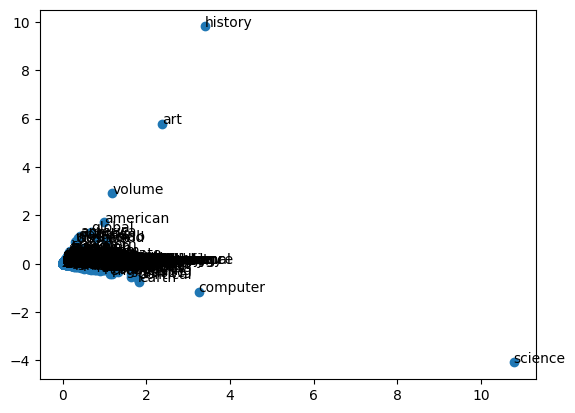

In [63]:
plt.scatter(Z[:,0],Z[:,1])
for i in range(D):
  plt.annotate(text=index_word_map[i],xy=(Z[i,0],Z[i,1]))
plt.show()